In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/facial_expression/
!ls

/content/drive/MyDrive/facial_expression
checkpoint  fer2013  fer2013.rar  fer2013.tar.gz  target_directory


In [ ]:
! pip install rarfile
import rarfile

In [ ]:


# Replace 'your_archive.rar' with the path to your .rar file
rar_file_path = 'fer2013.rar'

# Create a RarFile object
with rarfile.RarFile(rar_file_path, 'r') as rar:
    # List the contents of the archive
    print(f"Contents of {rar_file_path}:")
    for file_info in rar.infolist():
        print(file_info.filename)

    # Extract all files in the archive to a target directory
    # Replace 'target_directory' with the path to the directory where you want to extract the files
    target_directory = 'target_directory'
    rar.extractall(target_directory)

print("Extraction complete.")

Contents of fer2013.rar:
fer2013/fer2013/fer2013.bib
fer2013/fer2013/fer2013.csv
fer2013/fer2013/fer2013binary.csv
fer2013/fer2013/README
fer2013/fer2013/
fer2013/
Extraction complete.


In [ ]:
# import tarfile


# fname = 'fer2013.tar.gz'
# if fname.endswith("tar.gz"):
#     tar = tarfile.open(fname, "r:gz")
#     tar.extractall()
#     tar.close()
# elif fname.endswith("tar"):
#     tar = tarfile.open(fname, "r:")
#     tar.extractall()
#     tar.close()

# print("Extraction complete.")

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [ ]:
# df = pd.read_csv('fer2013/fer2013.csv')
# df.head()
df = pd.read_csv('fer2013/fer2013binary.csv')
df.head()

,emotion,original,pixels,Usage
0,0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,0,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,1,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,1,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.emotion.unique()

array([0, 1])

In [ ]:
# label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
label_to_text = {0:'negative', 1:'positive'}

In [ ]:
sample_image = np.array(df.pixels.loc[0].split(' ')).reshape(48,48,1).astype('float')
# print(sample_image.shape)

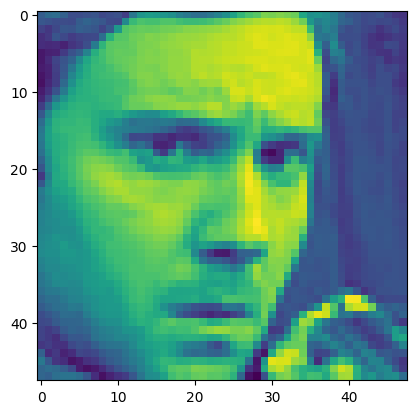

In [ ]:
pyplot.imshow(sample_image)

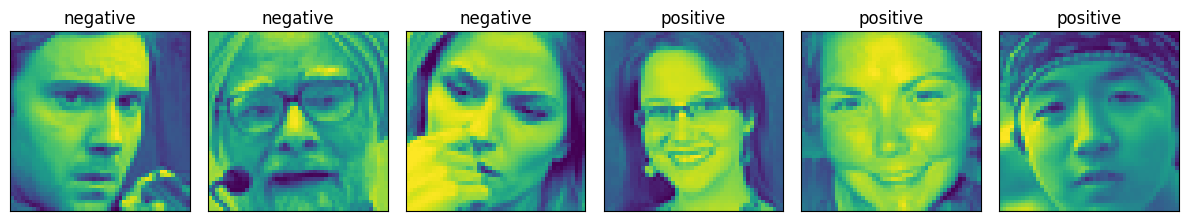

In [ ]:
fig = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48,1).astype('float32'))

In [ ]:
img_array = np.stack(img_array,axis = 0)
img_array.shape #img_array[i] represents a image size 48 * 48

(35887, 48, 48, 1)

In [ ]:
lables = df.emotion.values #lable array
lables.shape

(35887,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(img_array,lables,test_size=0.2) # split into 8: 2
#y_train is lable for X_train

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((28709, 48, 48, 1), (28709,), (7178, 48, 48, 1), (7178,))

In [ ]:
X_train/=255
X_test/=255

In [ ]:
# base_model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(48,48,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(48,48,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(2,2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(48,48,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(2,2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(48,48,1)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(2,2),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1024,activation = 'relu'),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(7,activation = 'softmax')
# ])

#binary:
base_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(48,48,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2,activation = 'softmax')
])

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0

In [ ]:

base_model.compile(optimizer = tf.keras.optimizers.experimental.SGD(learning_rate = 0.01,momentum =0.9,weight_decay=0.0001),
         loss = 'sparse_categorical_crossentropy', # not one hot encoded, then start training
         #if one hot encoded, use categorical cross entropy
         metrics = ['accuracy']
        )
# from tensorflow.keras.metrics import AUC
# #IF ADD AUC
# base_model.compile(optimizer = tf.keras.optimizers.experimental.SGD(learning_rate = 0.01,momentum =0.9,weight_decay=0.0001),
#          loss = 'sparse_categorical_crossentropy', # not one hot encoded, then start training
#          #if one hot encoded, use categorical cross entropy
#          metrics = [tf.keras.metrics.AUC()])

In [ ]:
import os
try:
  os.mkdir('checkpoint')
except:
  pass

In [ ]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                        monitor='val_accuracy',
                        verbose=1,
                        save_freq='epoch',
                        save_best_only=True,
                        save_weights_only=False,
                        mode='max')
# # import tensorflow as tf
# import tensorflow as tf
# from sklearn.metrics import roc_auc_score
# from tensorflow.keras.callbacks import Callback

# class AUCCallback(Callback):
#     def __init__(self, validation_data):
#         super().__init__()
#         self.validation_data = validation_data
#         self.auc_scores = []  # To store AUC scores after each epoch

#     def on_epoch_end(self, epoch, logs=None):
#         y_true = self.validation_data[1]
#         y_pred = self.model.predict(self.validation_data[0])
#         auc = roc_auc_score(y_true, y_pred)
#         self.auc_scores.append(auc)


In [ ]:
#before adding auc call back
hist = base_model.fit(X_train,y_train,epochs = 5,validation_split = 0.1,callbacks=call_back)
# hist = base_model.fit(X_train,y_train,epochs = 50,validation_split = 0.1,callbacks=callbacks)

Epoch 1/5
805/808 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9236
Epoch 1: val_accuracy improved from 0.79659 to 0.80773, saving model to checkpoint/best_model.h5
808/808 [==============================] - 10s 13ms/step - loss: 0.1882 - accuracy: 0.9238 - val_loss: 0.5627 - val_accuracy: 0.8077
Epoch 2/5
804/808 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9234
Epoch 2: val_accuracy did not improve from 0.80773
808/808 [==============================] - 10s 12ms/step - loss: 0.1881 - accuracy: 0.9234 - val_loss: 0.5662 - val_accuracy: 0.8025
Epoch 3/5
807/808 [============================>.] - ETA: 0s - loss: 0.1937 - accuracy: 0.9221
Epoch 3: val_accuracy did not improve from 0.80773
808/808 [==============================] - 9s 12ms/step - loss: 0.1937 - accuracy: 0.9221 - val_loss: 0.5804 - val_accuracy: 0.7994
Epoch 4/5
804/808 [============================>.] - ETA: 0s - loss: 0.2032 - accuracy: 0.9168
Epoch 4: val_accuracy d

In [ ]:
fig = pyplot.figure()
print(hist.history.keys())
# pyplot.plot(hist.history['auc'],color = 'red',label = 'train_loss')
# pyplot.plot(hist.history['val_auc'],color = 'blue',label = 'val_loss')
# fig.suptitle('Loss',fontsize=20)
# pyplot.legend(loc="upper left")
# pyplot.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Figure size 640x480 with 0 Axes>

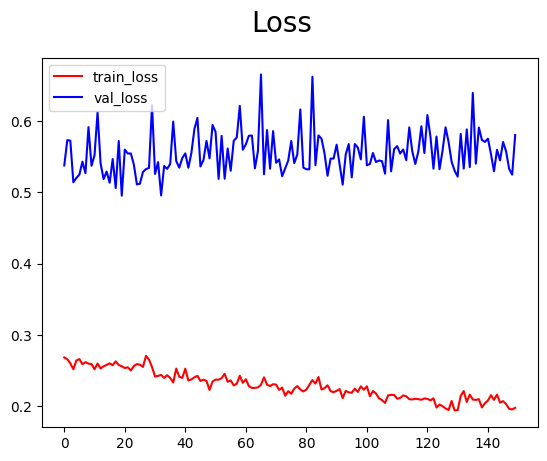

In [ ]:
fig = pyplot.figure()
pyplot.plot(hist.history['loss'],color = 'red',label = 'train_loss')
pyplot.plot(hist.history['val_loss'],color = 'blue',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
pyplot.legend(loc="upper left")
pyplot.show()

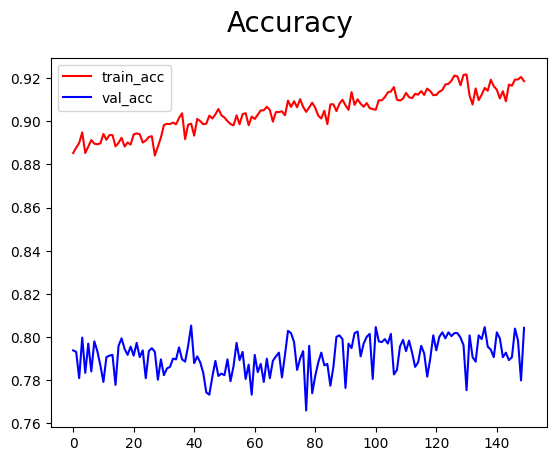

In [ ]:
fig = pyplot.figure()
pyplot.plot(hist.history['accuracy'],color = 'red',label = 'train_acc')
pyplot.plot(hist.history['val_accuracy'],color = 'blue',label = 'val_acc')
fig.suptitle('Accuracy',fontsize=20)
pyplot.legend(loc="upper left")
pyplot.show()

In [ ]:
final = tf.keras.models.load_model(checkpoint_path)
test_loss,test_acc = final.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

225/225 [==============================] - 1s 4ms/step - loss: 0.5740 - accuracy: 0.7761
Test accuracy: 0.7761214971542358


In [ ]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score
#calculate AUC:
y_pred= final.predict(X_test)
# print(y_test)
# print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
auc = roc_auc_score(y_test,y_pred)
# print(auc)
print("Test AUC:",auc)

225/225 [==============================] - 1s 4ms/step
Test AUC: 0.7161639177835755


In [ ]:
fig = pyplot.figure()
pyplot.plot(hist.history[''],color = 'red',label = 'train_loss')
pyplot.plot(hist.history['val_loss'],color = 'blue',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
pyplot.legend(loc="upper left")
pyplot.show()

In [ ]:
pred = final.predict(X_test)
print(type(pred))
print(pred.shape)
pred = np.argmax(pred, axis=1)
# pred = tf.nn.softmax(pred)
print(pred)
print(pred.shape)
print(y_test)
print(y_test.shape)
from sklearn.metrics import confusion_matrix
confusion_matrix  (y_test,pred)


225/225 [==============================] - 1s 3ms/step
<class 'numpy.ndarray'>
(7178, 2)
[1 1 1 ... 1 1 0]
(7178,)
[1 1 0 ... 1 0 0]
(7178,)


array([[1030, 1138],
       [ 414, 4596]])

In [ ]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test) # get unique lable

array([0, 1])

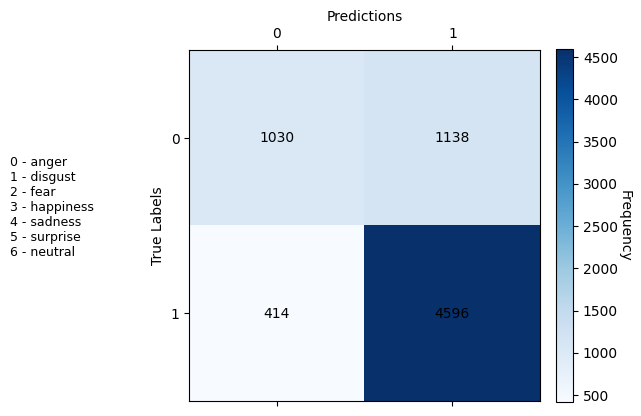

In [ ]:
cm = confusion_matrix(y_test, pred)
fig, ax = pyplot.subplots()
cax = ax.matshow(cm, cmap=pyplot.cm.Blues, interpolation="nearest")
cbar = fig.colorbar(cax, fraction=0.046, pad=0.04)
cbar.set_label("Frequency", rotation=270, labelpad=10)
for (i, j), z in np.ndenumerate(cm):
  ax.text(j, i, z, ha="center", va="center")
label = "0 - anger\n1 - disgust\n2 - fear\n3 - happiness\n4 - sadness \n5 - surprise\n6 - neutral\n"
pyplot.gcf().text(0.02, 0.4,label, fontsize=9)
pyplot.subplots_adjust(left=0.3)
ax.set_xlabel("Predictions")
ax.xaxis.set_label_position("top")
ax.set_ylabel("True Labels")
pyplot.show()


actual label: positive
1/1 [==============================] - 0s 54ms/step
predict label: positive
CORRECT


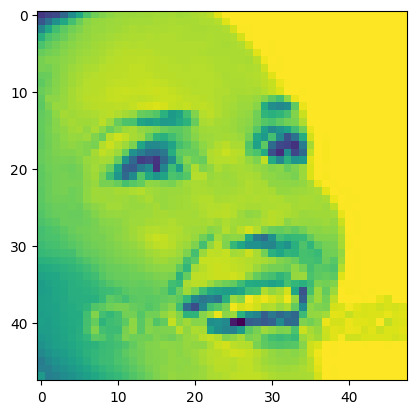

In [ ]:
from IPython.display import clear_output
import time
final_model = base_model
final_model.load_weights(checkpoint_path)
for k in range(2):
  actual = label_to_text[y_test[k]]
  print(f'actual label: {actual}')
  predict = label_to_text[final_model.predict(tf.expand_dims(X_test[k],0)).argmax()]
  print(f'predict label: {predict}')
  if actual == predict:
    print("CORRECT")
  else:
    print("WRONG ")
  pyplot.imshow(X_test[k])
  pyplot.show()
  clear_output(wait = True)


In [ ]:
def test_equal(x1,x2):
  set1 ={0,1,2}
  set2 = {3,4,5}
  set3={6}
  if x1 in set1 and x2 in set1:
    return True
  if x1 in set2 and x2 in set2:
    return True
  if x1 in set3 and x2 in set3:
    return True
  return False

print(test_equal(1,2))
print(test_equal(3,4))
def test_equal1(x1,x2):
  set1 ={0,1,2}
  set2 = {3,4,5,6}

  if x1 in set1 and x2 in set1:
    return True
  if x1 in set2 and x2 in set2:
    return True

  return False

True
True


In [ ]:
random.seed(5)
k = random.random()
px = df[df.emotion==label].pixels.iloc[k]
px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
k += 1
ax = pyplot.subplot(7, 7, k)
ax.imshow(px)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(label_to_text[label])
pyplot.tight_layout()

In [ ]:
total = y_test.shape[0]
correct = 0
print(total)
for i in range( ):
  predict = final_model.predict(tf.expand_dims(X_test[i],0)).argmax()
  # print(predict)
  # print(y_test[i])
  if predict==y_test[i]:
    correct+=1

  # if test_equal1(predict,y_test[i]):
  #   correct+=1


print("accuracy",correct/500)


7178
1/1 [==============================] - 0s 21ms/step
accuracy 0.782
